In [570]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

In [571]:
data = pd.read_csv('/content/diabetes_prediction_dataset.csv')
data

gender   age  hypertension  heart_disease smoking_history    bmi  \
0      Female  80.0             0              1           never  25.19   
1      Female  54.0             0              0         No Info  27.32   
2        Male  28.0             0              0           never  27.32   
3      Female  36.0             0              0         current  23.45   
4        Male  76.0             1              1         current  20.14   
...       ...   ...           ...            ...             ...    ...   
99995  Female  80.0             0              0         No Info  27.32   
99996  Female   2.0             0              0         No Info  17.37   
99997    Male  66.0             0              0          former  27.83   
99998  Female  24.0             0              0           never  35.42   
99999  Female  57.0             0              0         current  22.43   

       HbA1c_level  blood_glucose_level  diabetes  
0              6.6                  140         0  
1              6.6                   80         0  
2              5.7                  158         0  
3              5.0                  155         0  
4              4.8                  155         0  
...            ...                  ...       ...  
99995          6.2                   90         0  
99996          6.5                  100         0  
99997          5.7                  155         0  
99998          4.0                  100         0  
99999          6.6                   90         0  

[100000 rows x 9 columns]

In [572]:
data.describe()

age  hypertension  heart_disease            bmi  \
count  100000.000000  100000.00000  100000.000000  100000.000000   
mean       41.885856       0.07485       0.039420      27.320767   
std        22.516840       0.26315       0.194593       6.636783   
min         0.080000       0.00000       0.000000      10.010000   
25%        24.000000       0.00000       0.000000      23.630000   
50%        43.000000       0.00000       0.000000      27.320000   
75%        60.000000       0.00000       0.000000      29.580000   
max        80.000000       1.00000       1.000000      95.690000   

         HbA1c_level  blood_glucose_level       diabetes  
count  100000.000000        100000.000000  100000.000000  
mean        5.527507           138.058060       0.085000  
std         1.070672            40.708136       0.278883  
min         3.500000            80.000000       0.000000  
25%         4.800000           100.000000       0.000000  
50%         5.800000           140.000000       0.000000  
75%         6.200000           159.000000       0.000000  
max         9.000000           300.000000       1.000000

<Axes: xlabel='age', ylabel='Density'>

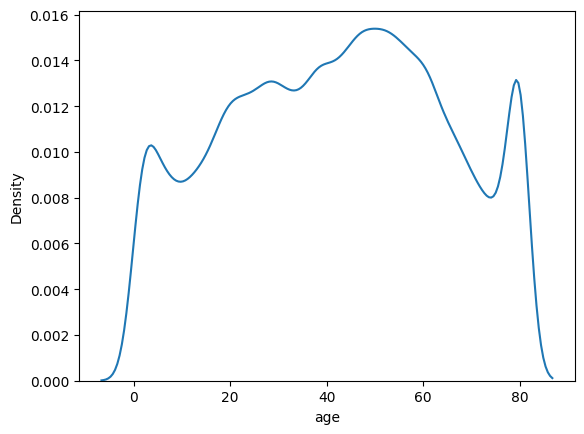

In [573]:
sns.kdeplot(data=data, x="age")

In [574]:
data['age'].max()

80.0

<Axes: xlabel='smoking_history', ylabel='count'>

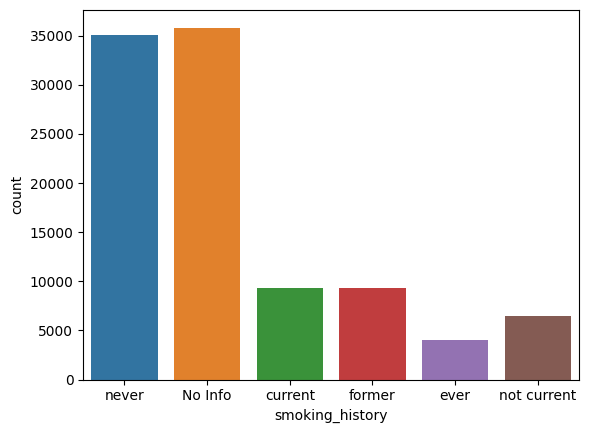

In [575]:
sns.countplot(x= data['smoking_history'])

<Axes: xlabel='gender', ylabel='count'>

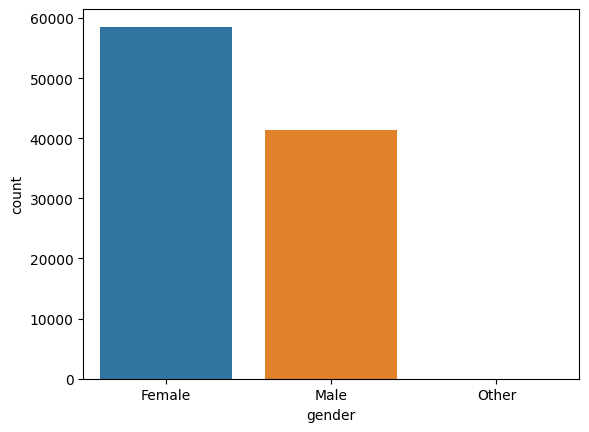

In [576]:
sns.countplot(x= data['gender'])

In [577]:
data.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [578]:
data['gender'].unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [579]:
data['smoking_history'].unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [580]:
data['heart_disease'].unique()

array([1, 0])

In [581]:

data['hypertension'].unique()

array([0, 1])

In [582]:
columns = list(data.columns)
columns

['gender',
 'age',
 'hypertension',
 'heart_disease',
 'smoking_history',
 'bmi',
 'HbA1c_level',
 'blood_glucose_level',
 'diabetes']

In [583]:
for column in columns:
  print(data[column].unique())

['Female' 'Male' 'Other']
[80.   54.   28.   36.   76.   20.   44.   79.   42.   32.   53.   78.
 67.   15.   37.   40.    5.   69.   72.    4.   30.   45.   43.   50.
 41.   26.   34.   73.   77.   66.   29.   60.   38.    3.   57.   74.
 19.   46.   21.   59.   27.   13.   56.    2.    7.   11.    6.   55.
  9.   62.   47.   12.   68.   75.   22.   58.   18.   24.   17.   25.
  0.08 33.   16.   61.   31.    8.   49.   39.   65.   14.   70.    0.56
 48.   51.   71.    0.88 64.   63.   52.    0.16 10.   35.   23.    0.64
  1.16  1.64  0.72  1.88  1.32  0.8   1.24  1.    1.8   0.48  1.56  1.08
  0.24  1.4   0.4   0.32  1.72  1.48]
[0 1]
[1 0]
['never' 'No Info' 'current' 'former' 'ever' 'not current']
[25.19 27.32 23.45 ... 59.42 44.39 60.52]
[6.6 5.7 5.  4.8 6.5 6.1 6.  5.8 3.5 6.2 4.  4.5 9.  7.  8.8 8.2 7.5 6.8]
[140  80 158 155  85 200 145 100 130 160 126 159  90 260 220 300 280 240]
[0 1]


In [584]:
dataset = data.copy()

In [585]:
dataset['gender'] = dataset['gender'].replace('Female', 0)

In [586]:
dataset['gender'] = dataset['gender'].replace('Male', 1)

In [587]:
dataset['gender'] = dataset['gender'].replace('Other', 2)

<Axes: xlabel='smoking_history', ylabel='count'>

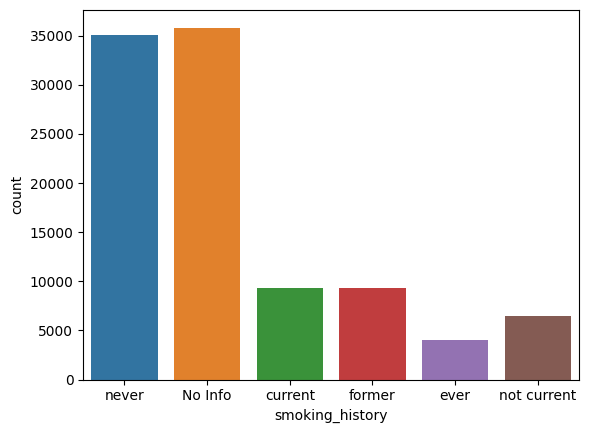

In [588]:
sns.countplot(x= dataset['smoking_history'])

In [589]:
dataset['gender'].unique()

array([0, 1, 2])

In [590]:
dataset['smoking_history'] = dataset['smoking_history'].replace('never', 0)
dataset['smoking_history'] = dataset['smoking_history'].replace('No Info', 1)
dataset['smoking_history'] = dataset['smoking_history'].replace('current', 2)
dataset['smoking_history'] = dataset['smoking_history'].replace('former', 3)
dataset['smoking_history'] = dataset['smoking_history'].replace('ever', 4)
dataset['smoking_history'] = dataset['smoking_history'].replace('not current', 5)

In [591]:
dataset['smoking_history'].unique()


array([0, 1, 2, 3, 4, 5])

In [592]:
def z_score(column):
  mean = np.mean(column)
  std = np.std(column)
  return (column - mean) / std

In [593]:
dataset['age'] = z_score(np.array(dataset['age']))

In [594]:
dataset['bmi'] = z_score(np.array(dataset['bmi']))

In [595]:
dataset['bmi']

0       -0.321056
1       -0.000116
2       -0.000116
3       -0.583232
4       -1.081970
           ...   
99995   -0.000116
99996   -1.499343
99997    0.076729
99998    1.220361
99999   -0.736922
Name: bmi, Length: 100000, dtype: float64

In [596]:
dataset['HbA1c_level'] = z_score(np.array(dataset['HbA1c_level']))

In [597]:
dataset['HbA1c_level']

0        1.001706
1        1.001706
2        0.161108
3       -0.492690
4       -0.679490
           ...   
99995    0.628107
99996    0.908306
99997    0.161108
99998   -1.426688
99999    1.001706
Name: HbA1c_level, Length: 100000, dtype: float64

In [598]:
dataset['blood_glucose_level'] = z_score(np.array(dataset['blood_glucose_level']))

In [599]:

dataset['blood_glucose_level']

0        0.047704
1       -1.426210
2        0.489878
3        0.416183
4        0.416183
           ...   
99995   -1.180558
99996   -0.934905
99997    0.416183
99998   -0.934905
99999   -1.180558
Name: blood_glucose_level, Length: 100000, dtype: float64

In [600]:
# dataset.dtypes


In [601]:

# dataset
dataset_ = dataset.copy()
dataset_

gender       age  hypertension  heart_disease  smoking_history  \
0           0  1.692704             0              1                0   
1           0  0.538006             0              0                1   
2           1 -0.616691             0              0                0   
3           0 -0.261399             0              0                2   
4           1  1.515058             1              1                2   
...       ...       ...           ...            ...              ...   
99995       0  1.692704             0              0                1   
99996       0 -1.771388             0              0                1   
99997       1  1.070944             0              0                3   
99998       0 -0.794336             0              0                0   
99999       0  0.671241             0              0                2   

            bmi  HbA1c_level  blood_glucose_level  diabetes  
0     -0.321056     1.001706             0.047704         0  
1     -0.000116     1.001706            -1.426210         0  
2     -0.000116     0.161108             0.489878         0  
3     -0.583232    -0.492690             0.416183         0  
4     -1.081970    -0.679490             0.416183         0  
...         ...          ...                  ...       ...  
99995 -0.000116     0.628107            -1.180558         0  
99996 -1.499343     0.908306            -0.934905         0  
99997  0.076729     0.161108             0.416183         0  
99998  1.220361    -1.426688            -0.934905         0  
99999 -0.736922     1.001706            -1.180558         0  

[100000 rows x 9 columns]

In [602]:
input_columns = list(dataset.columns)[:8]
input_columns
X = dataset.loc[: ,input_columns]
y = dataset.loc[:, 'diabetes']
# y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [603]:

X_train

gender       age  hypertension  heart_disease  smoking_history  \
76513       1  0.315949             0              0                4   
60406       1  0.982121             0              0                0   
27322       0 -0.794336             0              0                2   
53699       0  0.582418             0              0                2   
65412       1 -1.238451             0              0                1   
...       ...       ...           ...            ...              ...   
6265        1  0.315949             0              0                0   
54886       0 -1.194039             0              0                0   
76820       1  0.005069             0              0                0   
860         0 -0.216988             0              0                0   
15795       0 -0.838748             0              0                0   

            bmi  HbA1c_level  blood_glucose_level  
76513 -0.000116    -0.492690             0.416183  
60406 -0.000116    -1.893686             0.170530  
27322 -0.000116    -1.893686            -0.197948  
53699 -0.000116     0.908306             0.514444  
65412 -0.955402     0.628107            -1.303384  
...         ...          ...                  ...  
6265   0.852711     0.161108            -1.426210  
54886  0.117412    -0.492690             0.514444  
76820 -0.177913     0.254508            -1.303384  
860   -0.355711     0.628107             0.489878  
15795  0.100837    -0.492690             0.514444  

[70000 rows x 8 columns]

In [604]:
y_train

76513    0
60406    0
27322    0
53699    0
65412    0
        ..
6265     0
54886    0
76820    0
860      0
15795    0
Name: diabetes, Length: 70000, dtype: int64

In [605]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [606]:
y_pred = nb.predict(X_test)

In [607]:
accuracy = accuracy_score(y_test, y_pred)

In [608]:
accuracy

0.9063333333333333

In [609]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
tn, fp, fn, tp

(25557, 1896, 914, 1633)

In [610]:
# precision
precision = tp / (tp + fp)
precision

0.46273731935392465

In [611]:
# recall
recall = tp / (tp + fn)
recall

0.6411464468001571

In [612]:
# f1-score
f1_score = 2 * precision * recall / (precision + recall)
f1_score

0.5375246872942726

In [613]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95     27453
           1       0.46      0.64      0.54      2547

    accuracy                           0.91     30000
   macro avg       0.71      0.79      0.74     30000
weighted avg       0.92      0.91      0.91     30000



In [614]:
# decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [615]:
y_pred = clf.predict(X_test)

In [616]:
accuracy = accuracy_score(y_test, y_pred)

In [617]:
accuracy

0.9542

In [618]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
tn, fp, fn, tp

(26754, 699, 675, 1872)

In [619]:
# precision
precision = tp / (tp + fp)
precision

0.7281213535589265

In [620]:
# recall
recall = tp / (tp + fn)
recall

0.734982332155477

In [621]:
# f1-score
f1_score = 2 * precision * recall / (precision + recall)
f1_score

0.731535756154748

In [622]:
confusion_matrix(y_test, y_pred)

array([[26754,   699],
       [  675,  1872]])

In [623]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97     27453
           1       0.73      0.73      0.73      2547

    accuracy                           0.95     30000
   macro avg       0.85      0.85      0.85     30000
weighted avg       0.95      0.95      0.95     30000



In [624]:
# KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [625]:
y_pred = knn.predict(X_test)

In [626]:
accuracy = accuracy_score(y_test, y_pred)

In [627]:

accuracy

0.9599666666666666

In [628]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
tn, fp, fn, tp

(27276, 177, 1024, 1523)

In [629]:
# precision
precision = tp / (tp + fp)
precision

0.8958823529411765

In [630]:
# recall
recall = tp / (tp + fn)
recall

0.5979583824106792

In [631]:
# f1-score
f1_score = 2 * precision * recall / (precision + recall)
f1_score

0.7172121497527667

In [632]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98     27453
           1       0.90      0.60      0.72      2547

    accuracy                           0.96     30000
   macro avg       0.93      0.80      0.85     30000
weighted avg       0.96      0.96      0.96     30000



In [633]:
# Applying One hot encoding to dataset
dataset_ = dataset.copy()
one_hot = pd.get_dummies(dataset_['gender'])
dataset_ = pd.concat([one_hot, dataset_], axis=1)
dataset_.drop('gender', axis=1, inplace=True)

In [634]:
dataset_

0  1  2       age  hypertension  heart_disease  smoking_history  \
0      1  0  0  1.692704             0              1                0   
1      1  0  0  0.538006             0              0                1   
2      0  1  0 -0.616691             0              0                0   
3      1  0  0 -0.261399             0              0                2   
4      0  1  0  1.515058             1              1                2   
...   .. .. ..       ...           ...            ...              ...   
99995  1  0  0  1.692704             0              0                1   
99996  1  0  0 -1.771388             0              0                1   
99997  0  1  0  1.070944             0              0                3   
99998  1  0  0 -0.794336             0              0                0   
99999  1  0  0  0.671241             0              0                2   

            bmi  HbA1c_level  blood_glucose_level  diabetes  
0     -0.321056     1.001706             0.047704         0  
1     -0.000116     1.001706            -1.426210         0  
2     -0.000116     0.161108             0.489878         0  
3     -0.583232    -0.492690             0.416183         0  
4     -1.081970    -0.679490             0.416183         0  
...         ...          ...                  ...       ...  
99995 -0.000116     0.628107            -1.180558         0  
99996 -1.499343     0.908306            -0.934905         0  
99997  0.076729     0.161108             0.416183         0  
99998  1.220361    -1.426688            -0.934905         0  
99999 -0.736922     1.001706            -1.180558         0  

[100000 rows x 11 columns]

In [635]:
dataset_ = dataset_.rename(columns={0: 'Female'})

In [636]:
dataset_ = dataset_.rename(columns={1: 'Male'})

In [637]:
dataset_ = dataset_.rename(columns={2: 'Other'})

In [638]:
dataset_

Female  Male  Other       age  hypertension  heart_disease  \
0           1     0      0  1.692704             0              1   
1           1     0      0  0.538006             0              0   
2           0     1      0 -0.616691             0              0   
3           1     0      0 -0.261399             0              0   
4           0     1      0  1.515058             1              1   
...       ...   ...    ...       ...           ...            ...   
99995       1     0      0  1.692704             0              0   
99996       1     0      0 -1.771388             0              0   
99997       0     1      0  1.070944             0              0   
99998       1     0      0 -0.794336             0              0   
99999       1     0      0  0.671241             0              0   

       smoking_history       bmi  HbA1c_level  blood_glucose_level  diabetes  
0                    0 -0.321056     1.001706             0.047704         0  
1                    1 -0.000116     1.001706            -1.426210         0  
2                    0 -0.000116     0.161108             0.489878         0  
3                    2 -0.583232    -0.492690             0.416183         0  
4                    2 -1.081970    -0.679490             0.416183         0  
...                ...       ...          ...                  ...       ...  
99995                1 -0.000116     0.628107            -1.180558         0  
99996                1 -1.499343     0.908306            -0.934905         0  
99997                3  0.076729     0.161108             0.416183         0  
99998                0  1.220361    -1.426688            -0.934905         0  
99999                2 -0.736922     1.001706            -1.180558         0  

[100000 rows x 11 columns]

In [639]:
one_hot = pd.get_dummies(dataset_['smoking_history'])
dataset_ = pd.concat([one_hot, dataset_], axis=1)
dataset_.drop('smoking_history', axis=1, inplace=True)

In [640]:
dataset_

0  1  2  3  4  5  Female  Male  Other       age  hypertension  \
0      1  0  0  0  0  0       1     0      0  1.692704             0   
1      0  1  0  0  0  0       1     0      0  0.538006             0   
2      1  0  0  0  0  0       0     1      0 -0.616691             0   
3      0  0  1  0  0  0       1     0      0 -0.261399             0   
4      0  0  1  0  0  0       0     1      0  1.515058             1   
...   .. .. .. .. .. ..     ...   ...    ...       ...           ...   
99995  0  1  0  0  0  0       1     0      0  1.692704             0   
99996  0  1  0  0  0  0       1     0      0 -1.771388             0   
99997  0  0  0  1  0  0       0     1      0  1.070944             0   
99998  1  0  0  0  0  0       1     0      0 -0.794336             0   
99999  0  0  1  0  0  0       1     0      0  0.671241             0   

       heart_disease       bmi  HbA1c_level  blood_glucose_level  diabetes  
0                  1 -0.321056     1.001706             0.047704         0  
1                  0 -0.000116     1.001706            -1.426210         0  
2                  0 -0.000116     0.161108             0.489878         0  
3                  0 -0.583232    -0.492690             0.416183         0  
4                  1 -1.081970    -0.679490             0.416183         0  
...              ...       ...          ...                  ...       ...  
99995              0 -0.000116     0.628107            -1.180558         0  
99996              0 -1.499343     0.908306            -0.934905         0  
99997              0  0.076729     0.161108             0.416183         0  
99998              0  1.220361    -1.426688            -0.934905         0  
99999              0 -0.736922     1.001706            -1.180558         0  

[100000 rows x 16 columns]

In [641]:
dataset_ = dataset_.rename(columns={0: 'never'})
dataset_ = dataset_.rename(columns={1: 'No Info'})
dataset_ = dataset_.rename(columns={2: 'current'})
dataset_ = dataset_.rename(columns={3: 'former'})
dataset_ = dataset_.rename(columns={4: 'ever'})
dataset_ = dataset_.rename(columns={5: 'not current'})

In [642]:
dataset_

never  No Info  current  former  ever  not current  Female  Male  \
0          1        0        0       0     0            0       1     0   
1          0        1        0       0     0            0       1     0   
2          1        0        0       0     0            0       0     1   
3          0        0        1       0     0            0       1     0   
4          0        0        1       0     0            0       0     1   
...      ...      ...      ...     ...   ...          ...     ...   ...   
99995      0        1        0       0     0            0       1     0   
99996      0        1        0       0     0            0       1     0   
99997      0        0        0       1     0            0       0     1   
99998      1        0        0       0     0            0       1     0   
99999      0        0        1       0     0            0       1     0   

       Other       age  hypertension  heart_disease       bmi  HbA1c_level  \
0          0  1.692704             0              1 -0.321056     1.001706   
1          0  0.538006             0              0 -0.000116     1.001706   
2          0 -0.616691             0              0 -0.000116     0.161108   
3          0 -0.261399             0              0 -0.583232    -0.492690   
4          0  1.515058             1              1 -1.081970    -0.679490   
...      ...       ...           ...            ...       ...          ...   
99995      0  1.692704             0              0 -0.000116     0.628107   
99996      0 -1.771388             0              0 -1.499343     0.908306   
99997      0  1.070944             0              0  0.076729     0.161108   
99998      0 -0.794336             0              0  1.220361    -1.426688   
99999      0  0.671241             0              0 -0.736922     1.001706   

       blood_glucose_level  diabetes  
0                 0.047704         0  
1                -1.426210         0  
2                 0.489878         0  
3                 0.416183         0  
4                 0.416183         0  
...                    ...       ...  
99995            -1.180558         0  
99996            -0.934905         0  
99997             0.416183         0  
99998            -0.934905         0  
99999            -1.180558         0  

[100000 rows x 16 columns]

In [643]:
input_columns = list(dataset_.columns)[:15]
input_columns
X = dataset_.loc[: ,input_columns]
y = dataset_.loc[:, 'diabetes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [644]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.6272333333333333

In [645]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
tn, fp, fn, tp

(16347, 11106, 77, 2470)

In [646]:
# precision
precision = tp / (tp + fp)
precision

0.1819387153800825

In [647]:
# recall
recall = tp / (tp + fn)
recall

0.9697683549273656

In [648]:
# f1-score
f1_score = 2 * precision * recall / (precision + recall)
f1_score

0.3063945915772499

In [649]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.60      0.75     27453
           1       0.18      0.97      0.31      2547

    accuracy                           0.63     30000
   macro avg       0.59      0.78      0.53     30000
weighted avg       0.93      0.63      0.71     30000



In [650]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9530666666666666

In [651]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
tn, fp, fn, tp

(26720, 733, 675, 1872)

In [652]:
# precision
precision = tp / (tp + fp)
precision

0.7186180422264875

In [653]:
# recall
recall = tp / (tp + fn)
recall

0.734982332155477

In [654]:
# f1-score
f1_score = 2 * precision * recall / (precision + recall)
f1_score

0.7267080745341615

In [655]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97     27453
           1       0.72      0.73      0.73      2547

    accuracy                           0.95     30000
   macro avg       0.85      0.85      0.85     30000
weighted avg       0.95      0.95      0.95     30000



In [656]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9601666666666666

In [657]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
tn, fp, fn, tp

(27282, 171, 1024, 1523)

In [658]:
# precision
precision = tp / (tp + fp)
precision

0.8990554899645808

In [659]:
# recall
recall = tp / (tp + fn)
recall

0.5979583824106792

In [660]:
# f1-score
f1_score = 2 * precision * recall / (precision + recall)
f1_score

0.7182268332940346

In [661]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98     27453
           1       0.90      0.60      0.72      2547

    accuracy                           0.96     30000
   macro avg       0.93      0.80      0.85     30000
weighted avg       0.96      0.96      0.96     30000



In [662]:
y

0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: diabetes, Length: 100000, dtype: int64

In [663]:
check = 0
for value in y:
  if value == 1:
    check = check + 1
print(check)

8500


In [664]:
check = 0
for value in y:
  if value == 0:
    check = check + 1
print(check)

91500


In [665]:
print(check + 8500)

100000


In [666]:
dataset_

never  No Info  current  former  ever  not current  Female  Male  \
0          1        0        0       0     0            0       1     0   
1          0        1        0       0     0            0       1     0   
2          1        0        0       0     0            0       0     1   
3          0        0        1       0     0            0       1     0   
4          0        0        1       0     0            0       0     1   
...      ...      ...      ...     ...   ...          ...     ...   ...   
99995      0        1        0       0     0            0       1     0   
99996      0        1        0       0     0            0       1     0   
99997      0        0        0       1     0            0       0     1   
99998      1        0        0       0     0            0       1     0   
99999      0        0        1       0     0            0       1     0   

       Other       age  hypertension  heart_disease       bmi  HbA1c_level  \
0          0  1.692704             0              1 -0.321056     1.001706   
1          0  0.538006             0              0 -0.000116     1.001706   
2          0 -0.616691             0              0 -0.000116     0.161108   
3          0 -0.261399             0              0 -0.583232    -0.492690   
4          0  1.515058             1              1 -1.081970    -0.679490   
...      ...       ...           ...            ...       ...          ...   
99995      0  1.692704             0              0 -0.000116     0.628107   
99996      0 -1.771388             0              0 -1.499343     0.908306   
99997      0  1.070944             0              0  0.076729     0.161108   
99998      0 -0.794336             0              0  1.220361    -1.426688   
99999      0  0.671241             0              0 -0.736922     1.001706   

       blood_glucose_level  diabetes  
0                 0.047704         0  
1                -1.426210         0  
2                 0.489878         0  
3                 0.416183         0  
4                 0.416183         0  
...                    ...       ...  
99995            -1.180558         0  
99996            -0.934905         0  
99997             0.416183         0  
99998            -0.934905         0  
99999            -1.180558         0  

[100000 rows x 16 columns]

Applying K-Fold Cross Validation

In [667]:
# input_columns = list(dataset.columns)[:8]
# input_columns
# X = dataset.loc[: ,input_columns]
# y = dataset.loc[:, 'diabetes']
# X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.3, random_state=42)
input_columns = list(dataset_.columns)[:15]
input_columns
X = dataset_.loc[: ,input_columns]
y = dataset_.loc[:, 'diabetes']
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.3, random_state=42)

In [668]:
# create modesl
nb = GaussianNB()
clf = DecisionTreeClassifier()
knn = KNeighborsClassifier()

In [669]:
# Set the number of folds
k = 10
# Create a KFold object
kf = KFold(n_splits=k, shuffle=True)
# Initialize a list to store the accuracy for each fold
accuracy_nb = []
accuracy_clf = []
accuracy_knn = []

In [670]:
for train_index, test_index in kf.split(X_train1):
    # Split the data into training and testing sets for this fold
    X_train, X_test = X_train1.iloc[train_index], X_train1.iloc[test_index]
    y_train, y_test = y_train1.iloc[train_index], y_train1.iloc[test_index]
    
    # Fit the classifiers to the training data
    nb.fit(X_train, y_train)
    clf.fit(X_train, y_train)
    knn.fit(X_train, y_train)
    # Evaluate the classifiers on the testing data and append the accuracy to the lists
    y_pred = nb.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_nb.append(accuracy)
    print(classification_report(y_test, y_pred))

    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_clf.append(accuracy)
    print(classification_report(y_test, y_pred))

    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_knn.append(accuracy)
    

accuracy_nb = sum(accuracy_nb) / len(accuracy_nb)
accuracy_clf = sum(accuracy_clf) / len(accuracy_clf)
accuracy_knn = sum(accuracy_knn) / len(accuracy_knn)
print(accuracy_nb)
print(accuracy_clf)
print(accuracy_knn)

              precision    recall  f1-score   support

           0       1.00      0.59      0.74      6398
           1       0.18      0.97      0.31       602

    accuracy                           0.62      7000
   macro avg       0.59      0.78      0.52      7000
weighted avg       0.93      0.62      0.70      7000

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      6398
           1       0.72      0.73      0.73       602

    accuracy                           0.95      7000
   macro avg       0.85      0.85      0.85      7000
weighted avg       0.95      0.95      0.95      7000

              precision    recall  f1-score   support

           0       0.99      0.61      0.76      6390
           1       0.19      0.96      0.32       610

    accuracy                           0.64      7000
   macro avg       0.59      0.79      0.54      7000
weighted avg       0.92      0.64      0.72      7000

              preci

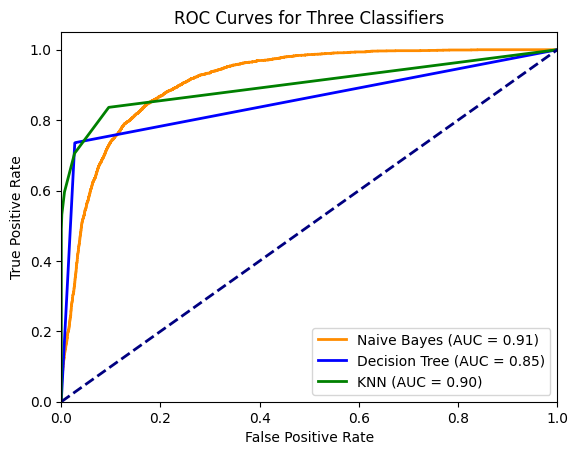

In [671]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities for each classifier
y_prob1 = nb.predict_proba(X_test1)[:, 1]
y_prob2 = clf.predict_proba(X_test1)[:, 1]
y_prob3 = knn.predict_proba(X_test1)[:, 1]

# Calculate FPR and TPR for each classifier at different threshold values
fpr1, tpr1, _ = roc_curve(y_test1, y_prob1)
fpr2, tpr2, _ = roc_curve(y_test1, y_prob2)
fpr3, tpr3, _ = roc_curve(y_test1, y_prob3)

# Calculate AUC score for each classifier
roc_auc1 = auc(fpr1, tpr1)
roc_auc2 = auc(fpr2, tpr2)
roc_auc3 = auc(fpr3, tpr3)

# Plot ROC curves for each classifier on the same graph
plt.figure()
plt.plot(fpr1, tpr1, color='darkorange', lw=2, label='Naive Bayes (AUC = %0.2f)' % roc_auc1)
plt.plot(fpr2, tpr2, color='blue', lw=2, label='Decision Tree (AUC = %0.2f)' % roc_auc2)
plt.plot(fpr3, tpr3, color='green', lw=2, label='KNN (AUC = %0.2f)' % roc_auc3)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Three Classifiers')
plt.legend(loc="lower right")
plt.show()
